In [1]:
# --- Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score,
                             roc_curve, auc, precision_recall_curve)

In [ ]:

# Load your datasets
train_df = pd.read_csv('xray_features_train.csv')  # Change to your CSV names
test_df = pd.read_csv('xray_features_test.csv')

# Split features and labels
X_train = train_df[[f'Feat_{i}' for i in range(64)]].values
y_train = train_df['Label'].values

X_test = test_df[[f'Feat_{i}' for i in range(64)]].values
y_test = test_df['Label'].values

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:

# --- Hyperparameter Tuning Random Forest ---
param_grid = {
    'n_estimators': [300, 500, 700],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose=2, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   7.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   7.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   8.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   8.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   9.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   8.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  13.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total

In [4]:

# --- Predictions ---
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:,1]


In [5]:

# --- Evaluation ---
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       234
           1       0.89      0.86      0.88       390

    accuracy                           0.85       624
   macro avg       0.84      0.84      0.84       624
weighted avg       0.85      0.85      0.85       624

Accuracy: 0.8477564102564102


In [6]:

# --- Plots (same as SVM) ---
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def plot_roc(y_true, y_prob):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.2f}')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

def plot_precision_recall(y_true, y_prob):
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()


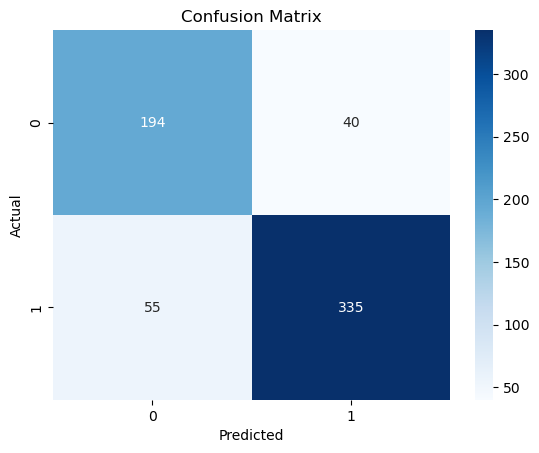

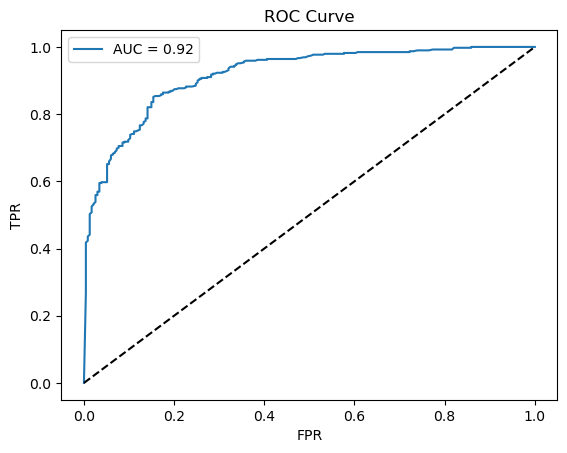

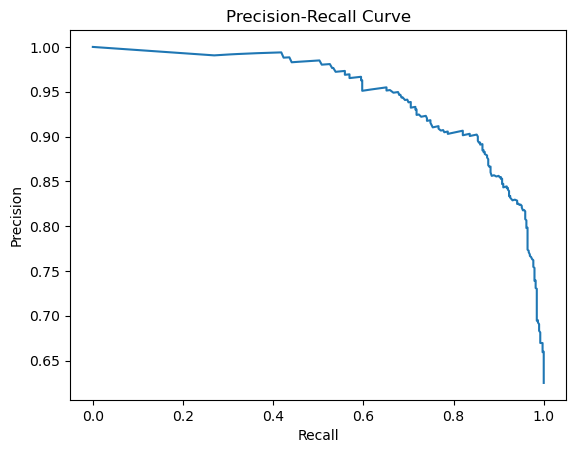

In [7]:

plot_confusion_matrix(y_test, y_pred)
plot_roc(y_test, y_prob)
plot_precision_recall(y_test, y_prob)
